# Video preprocessing

In [118]:
from main import VideoAnalyzer
import pyclustertend
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import pandas as pd
import math

In [119]:
v = VideoAnalyzer()
df = v.run('test_10.mp4')

In [120]:
df

,time,x,y,speed,event
0,0.00000,349.0,245.0,None,None
1,0.00000,157.0,72.5,None,None
2,0.02439,349.0,245.0,None,None
3,0.02439,157.0,72.5,None,None
4,0.02439,349.0,245.0,None,None
...,...,...,...,...,...
9526,100.00000,679.0,267.0,None,None
9527,100.00000,683.0,266.0,None,None
9528,100.00000,687.0,266.0,None,None
9529,100.00000,691.0,268.0,None,None


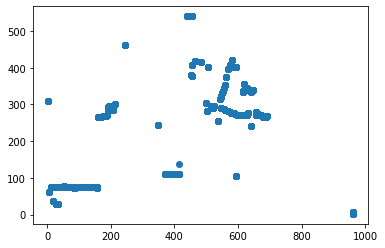

In [121]:
plt.scatter(df.x, df.y)
plt.show()

[[405.06783103 132.82372055  13.68505931]
 [192.38698104 287.53690415  18.76685347]
 [100.29582786  74.07785808  14.78292049]
 [548.96475017 358.38620808  23.52975673]
 [960.           5.75326371  21.84692516]]


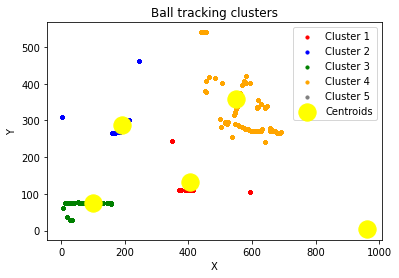

In [122]:
kmeans = cluster.KMeans(n_clusters = 5)
X = df[['x', 'y', 'time']].values
y_kmeans = kmeans.fit_predict(X)

centroides = kmeans.cluster_centers_
print(centroides)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'gray', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Ball tracking clusters')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

In [123]:
df['cluster'] = pd.Series(y_kmeans)

In [124]:
df

,time,x,y,speed,event,cluster
0,0.00000,349.0,245.0,None,None,0
1,0.00000,157.0,72.5,None,None,2
2,0.02439,349.0,245.0,None,None,0
3,0.02439,157.0,72.5,None,None,2
4,0.02439,349.0,245.0,None,None,0
...,...,...,...,...,...,...
9526,100.00000,679.0,267.0,None,None,3
9527,100.00000,683.0,266.0,None,None,3
9528,100.00000,687.0,266.0,None,None,3
9529,100.00000,691.0,268.0,None,None,3


In [125]:
df = df[df.cluster == int(df.cluster.mode())]
df

,time,x,y,speed,event,cluster
1,0.000000,157.0,72.5,None,None,2
3,0.024390,157.0,72.5,None,None,2
5,0.024390,157.5,76.5,None,None,2
7,0.024691,157.0,72.5,None,None,2
9,0.024691,157.5,76.5,None,None,2
...,...,...,...,...,...,...
9464,100.000000,11.5,76.5,None,None,2
9487,100.000000,19.5,36.5,None,None,2
9490,100.000000,33.5,28.5,None,None,2
9491,100.000000,5.0,63.0,None,None,2


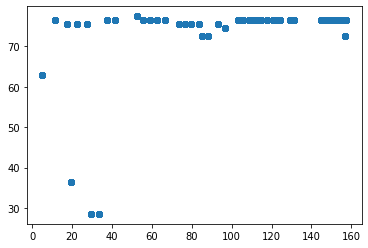

In [126]:
plt.scatter(df.x, df.y)
plt.show()

In [127]:
df = df.groupby(['time']).mean().reset_index()[['time', 'x', 'y']]
df

,time,x,y
0,0.000000,157.000000,72.500000
1,0.024390,157.250000,74.500000
2,0.024691,156.666667,75.166667
3,0.024793,155.875000,75.500000
4,0.024845,154.900000,75.700000
...,...,...,...
96,96.000000,89.093023,72.534884
97,97.000000,89.093023,72.534884
98,98.000000,89.093023,72.534884
99,99.000000,89.093023,72.534884


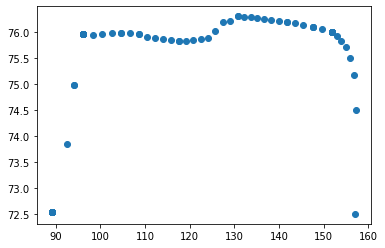

In [128]:
plt.scatter(df.x, df.y)
plt.show()

In [129]:
df['speed_x'] = (df['x'] - df['x'].shift(1)) /  (df['time'] - df['time'].shift(1))
df

,time,x,y,speed_x
0,0.000000,157.000000,72.500000,NaN
1,0.024390,157.250000,74.500000,10.250
2,0.024691,156.666667,75.166667,-1937.250
3,0.024793,155.875000,75.500000,-7759.125
4,0.024845,154.900000,75.700000,-18993.975
...,...,...,...,...
96,96.000000,89.093023,72.534884,0.000
97,97.000000,89.093023,72.534884,0.000
98,98.000000,89.093023,72.534884,0.000
99,99.000000,89.093023,72.534884,0.000


In [130]:
df['speed_y'] = (df['y'] - df['y'].shift(1)) /  (df['time'] - df['time'].shift(1))
df

,time,x,y,speed_x,speed_y
0,0.000000,157.000000,72.500000,NaN,NaN
1,0.024390,157.250000,74.500000,10.250,82.0
2,0.024691,156.666667,75.166667,-1937.250,2214.0
3,0.024793,155.875000,75.500000,-7759.125,3267.0
4,0.024845,154.900000,75.700000,-18993.975,3896.2
...,...,...,...,...,...
96,96.000000,89.093023,72.534884,0.000,0.0
97,97.000000,89.093023,72.534884,0.000,0.0
98,98.000000,89.093023,72.534884,0.000,0.0
99,99.000000,89.093023,72.534884,0.000,0.0


In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df

,time,x,y,speed_x,speed_y
0,-0.350220,1.805064,-1.257426,NaN,NaN
1,-0.349396,1.815097,-0.060907,0.469934,0.175455
2,-0.349386,1.791687,0.337933,0.469323,0.177250
3,-0.349382,1.759915,0.537353,0.467496,0.178137
4,-0.349380,1.720786,0.657005,0.463970,0.178667
...,...,...,...,...,...
96,2.892387,-0.920202,-1.236557,0.469931,0.175386
97,2.926164,-0.920202,-1.236557,0.469931,0.175386
98,2.959942,-0.920202,-1.236557,0.469931,0.175386
99,2.993719,-0.920202,-1.236557,0.469931,0.175386
